In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [4]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


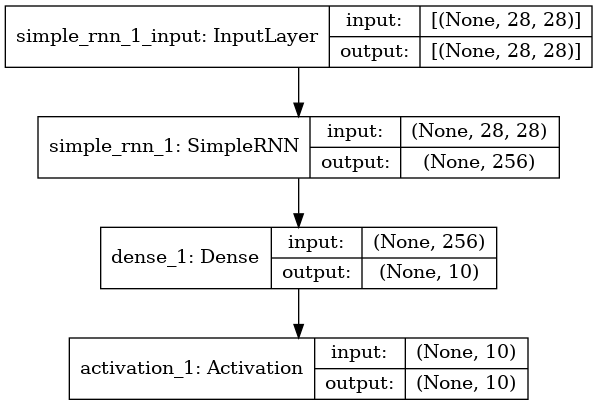

In [11]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()
plot_model(model, to_file='./data/rnn-mnist.png', show_shapes=True)

In [12]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [13]:
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

_, acc = model.evaluate(x_test, y_test,
                        batch_size=batch_size,
                        verbose=0)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
469/469 [==============================] - 8s 12ms/step - loss: 0.7453 - accuracy: 0.7859
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3119 - accuracy: 0.9093
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2303 - accuracy: 0.9316
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1894 - accuracy: 0.9436
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1658 - accuracy: 0.9508
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1486 - accuracy: 0.9546
Epoch 7/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1327 - accuracy: 0.9601
Epoch 8/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1247 - accuracy: 0.9633
Epoch 9/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1162 - accuracy: 0.9657
Epoch 10/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1082 - accura